# BÀI THỰC HÀNH PHẦN KERNEL SUPPORT VECTOR MACHINE

## Ví dụ 1

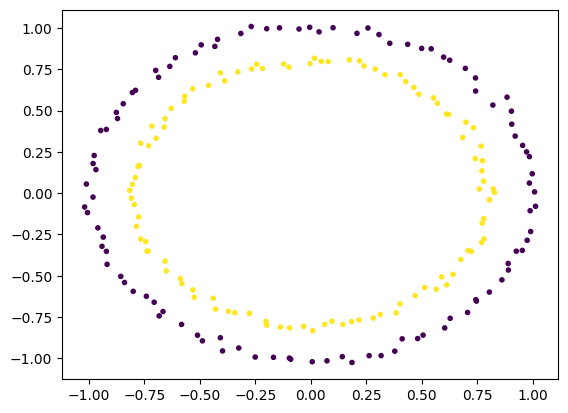

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_circles

# Generate dataset and targets
X, Y = make_circles(n_samples = 200, noise = 0.02)

# visualizing data
plt.scatter(X[:, 0], X[:, 1], c = Y, marker = '.')
plt.show()

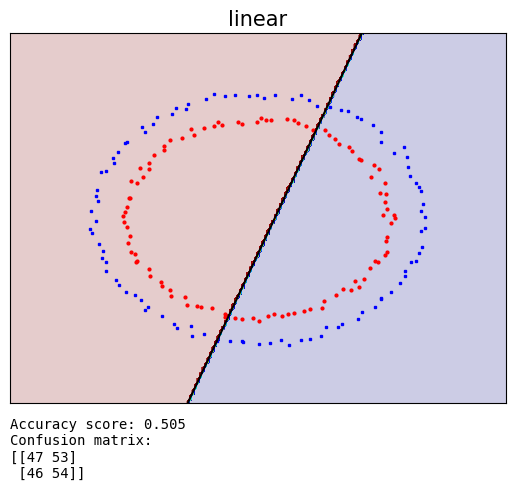

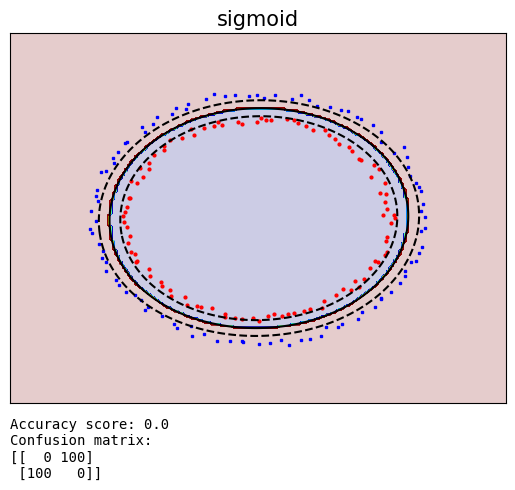

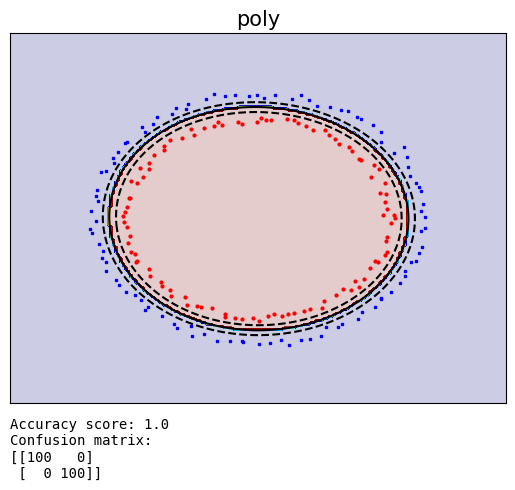

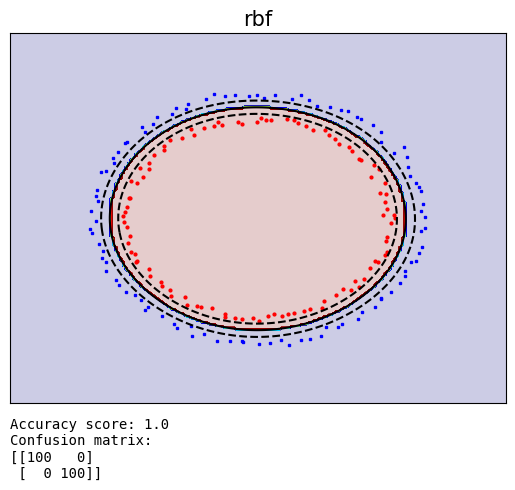

In [2]:
from sklearn.metrics import accuracy_score, confusion_matrix

fignum = 1

# fit the model
for kernel in ('linear','sigmoid', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma=1, coef0 = 1)
    clf.fit(X, Y)

    # plot the line, the points, and the nearest vectors to the plane
    fig, ax = plt.subplots()
    plt.figure(fignum, figsize=(5, 5))
    plt.clf()
    
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                    facecolors='None')
    plt.plot(X[Y==0, 0], X[Y==0, 1], 'bs', markersize = 2)
    plt.plot(X[Y==1, 0], X[Y==1, 1], 'ro', markersize = 2)
    
    plt.axis('tight')
    x_min = -1.5
    x_max = 1.5
    y_min = -1.5
    y_max = 1.5
    
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(5, 5))
    CS = plt.contourf(XX, YY, np.sign(Z), 200, cmap='jet', alpha = .2)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])
    plt.title(kernel, fontsize = 15)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1
    
    # Bài tập 1
    y_pred = clf.predict(X)
    s = f'Accuracy score: {accuracy_score(Y, y_pred)}\nConfusion matrix:\n{confusion_matrix(Y, y_pred)}'
    
    plt.text(0, -0.2, s, size=10, ha="left", 
             transform=ax.transAxes,
             fontfamily='monospace')

plt.show()

## Ví dụ 2

In [3]:
import pandas as pd

data = pd.read_csv('ex2data2.txt', header=None)

X = data.iloc[:, 0:2]
Y = data.iloc[:, 2].values

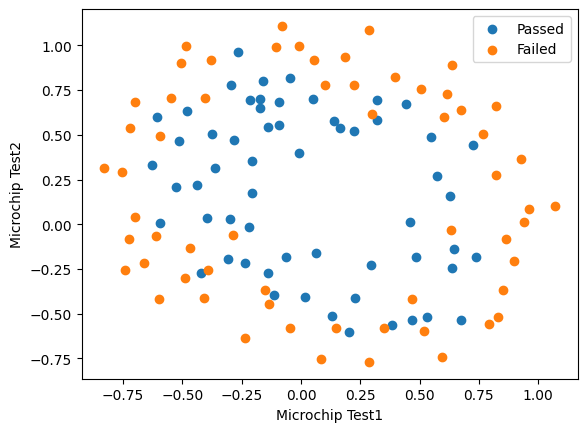

In [4]:
import matplotlib.pyplot as plt
from sklearn import svm

# visualizing data
mask = Y == 1
passed = plt.scatter(X[mask][0].values, X[mask][1].values)
failed = plt.scatter(X[~mask][0].values, X[~mask][1].values)
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()

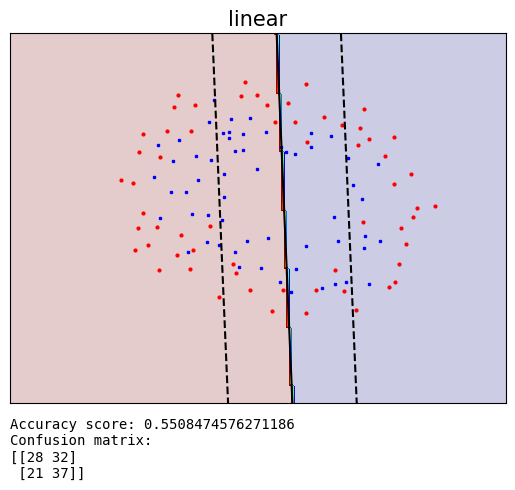

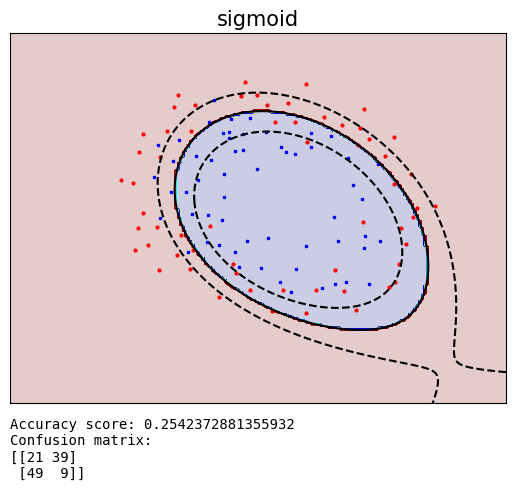

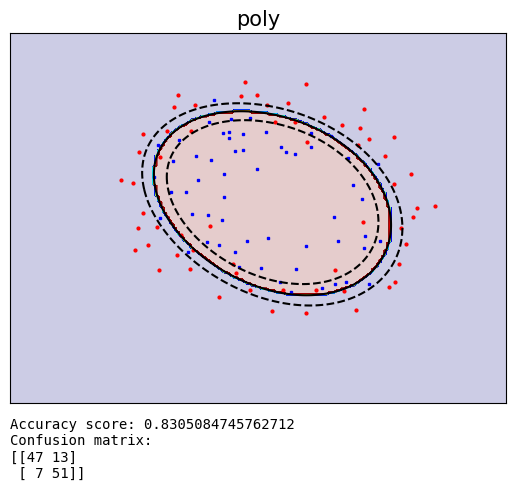

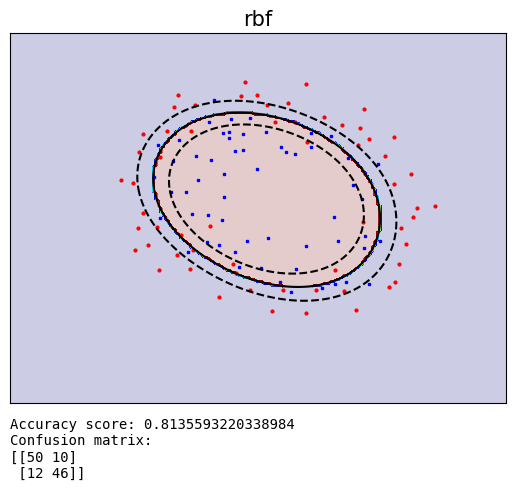

In [5]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

fignum = 1

# fit the model
for kernel in ('linear','sigmoid', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma=1, coef0 = 1)
    clf.fit(X, Y)

    # plot the line, the points, and the nearest vectors to the plane
    fig, ax = plt.subplots()
    plt.figure(fignum, figsize=(5, 5))
    plt.clf()
    
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='None')
    plt.plot(X[mask][0].values, X[mask][1].values, 'bs', markersize = 2)
    plt.plot(X[~mask][0].values, X[~mask][1].values, 'ro', markersize = 2)

    plt.axis('tight')
    x_min = -1.5
    x_max = 1.5
    y_min = -1.5
    y_max = 1.5
    
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(5, 5))
    CS = plt.contourf(XX, YY, np.sign(Z), 200, cmap='jet', alpha = .2)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])
    plt.title(kernel, fontsize = 15)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1
    
    y_pred = clf.predict(X)
    s = f'Accuracy score: {accuracy_score(Y, y_pred)}\nConfusion matrix:\n{confusion_matrix(Y, y_pred)}'
    
    plt.text(0, -0.2, s, size=10, ha="left", 
             transform=ax.transAxes,
             fontfamily='monospace')
    
plt.show()

## Bài tập tự thực hành 1

In [6]:
import scipy.io as sio
from sklearn.svm import SVC

A = sio.loadmat('ARgender.mat')
X_train = A['Y_train'].T
X_test = A['Y_test'].T
print(X_train.shape)
N = 700
y_train = A['label_train'].reshape(N)
y_test = A['label_test'].reshape(N)

(700, 300)


In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix

for kernel in ('linear','sigmoid', 'poly', 'rbf'):
    clf = SVC(kernel=kernel, gamma=1, coef0=1)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    print('Kernel:', kernel)
    print('Accuracy score:', accuracy_score(y_test, y_pred))
    print('Confusion matrix:')
    print(confusion_matrix(y_test, y_pred))
    print()

Kernel: linear
Accuracy score: 0.9028571428571428
Confusion matrix:
[[344   6]
 [ 62 288]]

Kernel: sigmoid
Accuracy score: 0.8942857142857142
Confusion matrix:
[[342   8]
 [ 66 284]]

Kernel: poly
Accuracy score: 0.9228571428571428
Confusion matrix:
[[330  20]
 [ 34 316]]

Kernel: rbf
Accuracy score: 0.9085714285714286
Confusion matrix:
[[341   9]
 [ 55 295]]



## Bài tập tự thực hành 2

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('dataset.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Chuyển vị ma trận dữ liệu do ta đọc bằng Pandas => mỗi record là 1 dong
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
XTrain = sc.fit_transform(XTrain)
XTest = sc.transform(XTest)

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix

for kernel in ('linear','sigmoid', 'poly', 'rbf'):
    clf = SVC(kernel=kernel, gamma=1, coef0=1)
    clf.fit(XTrain, yTrain)
    
    y_pred = clf.predict(XTest)
    
    print('Kernel:', kernel)
    print('Accuracy score:', accuracy_score(yTest, y_pred))
    print('Confusion matrix:')
    print(confusion_matrix(yTest, y_pred))
    print()

Kernel: linear
Accuracy score: 0.9
Confusion matrix:
[[66  2]
 [ 8 24]]

Kernel: sigmoid
Accuracy score: 0.7
Confusion matrix:
[[53 15]
 [15 17]]

Kernel: poly
Accuracy score: 0.93
Confusion matrix:
[[64  4]
 [ 3 29]]

Kernel: rbf
Accuracy score: 0.93
Confusion matrix:
[[64  4]
 [ 3 29]]



## Bài tập tự thực hành 3

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')

# Breast cancer dataset for classification
data = load_breast_cancer()
print (data.feature_names)
print (data.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(data.data,
                                                    data.target,
                                                    test_size=0.3,
                                                    random_state=42)

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix

for kernel in ('linear','sigmoid', 'rbf'):
    clf = SVC(kernel=kernel, gamma=1, coef0=1)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    print('Kernel:', kernel)
    print('Accuracy score:', accuracy_score(y_test, y_pred))
    print('Confusion matrix:')
    print(confusion_matrix(y_test, y_pred))
    print()

Kernel: linear
Accuracy score: 0.9649122807017544
Confusion matrix:
[[ 59   4]
 [  2 106]]

Kernel: sigmoid
Accuracy score: 0.631578947368421
Confusion matrix:
[[  0  63]
 [  0 108]]

Kernel: rbf
Accuracy score: 0.631578947368421
Confusion matrix:
[[  0  63]
 [  0 108]]

